In [5]:
using Images, TestImages, Plots

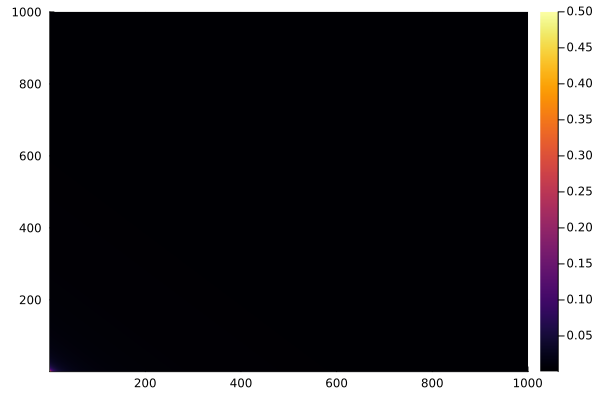

In [94]:
n = 1000;
A = [1/(k+j) for k=1:n, j=1:n]
heatmap(A)

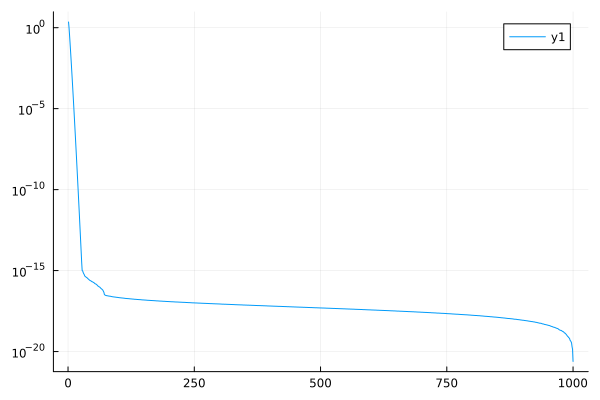

In [95]:
plot(svdvals(A); yscale=:log10)

In [96]:
U,σ,V = svd(A)

r = 20
norm(U[:,1:r] * Diagonal(σ[1:r]) * V[:,1:r]' - A)


2.311502981999057e-11

In [97]:
length(A), 2 * n*r

(1000000, 40000)

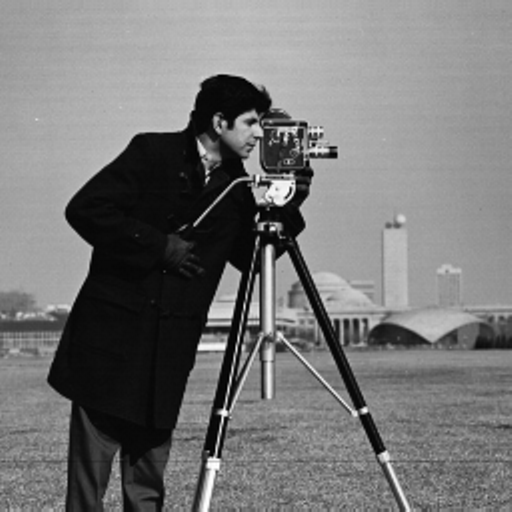

In [73]:
img = testimage("cameraman")

In [74]:
typeof(img)

Matrix{Gray{N0f8}} (alias for Array{Gray{Normed{UInt8, 8}}, 2})

In [75]:
Float64(img[1,2]) # number between 0 and 1

0.615686274509804

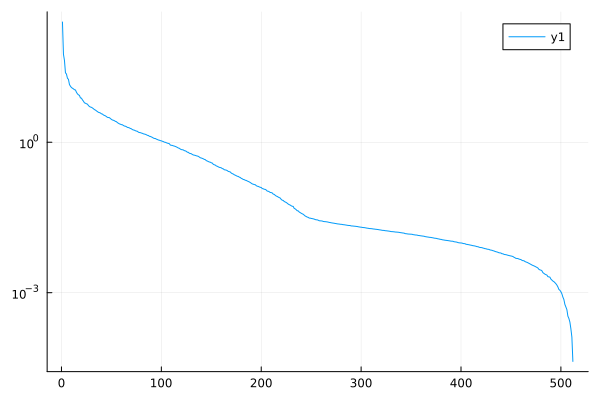

In [80]:
A = Float64.(img)

plot(svdvals(A); yscale=:log10)

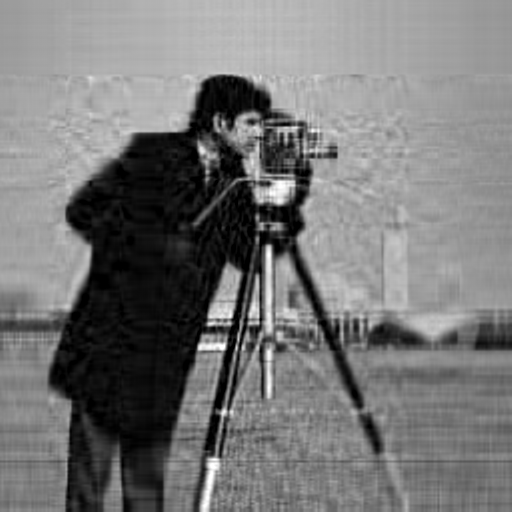

In [78]:
r = 25
U,σ,V = svd(A)

Gray.(U[:,1:r] * Diagonal(σ[1:r]) * V[:,1:r]')

In [79]:
# original, compressed
length(img), 2*512*r

(262144, 25600)

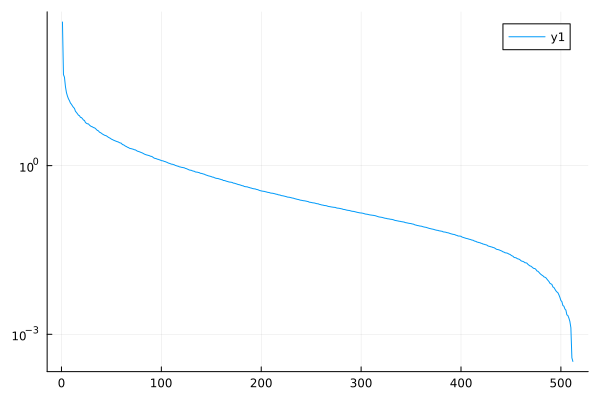

In [66]:
img = testimage("jetplane")
nanabs = x -> iszero(x) ? NaN : abs(x)
A = Float64.(Gray.(img))
plot(svdvals(A); yscale=:log10)

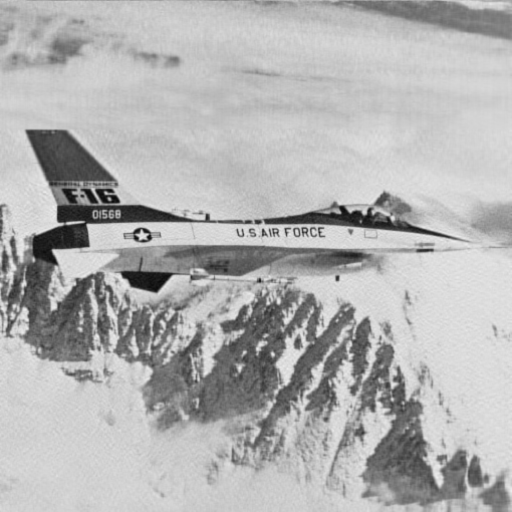

In [70]:
r = 100
U,σ,V = svd(A)

Gray.(U[:,1:r] * Diagonal(σ[1:r]) * V[:,1:r]')

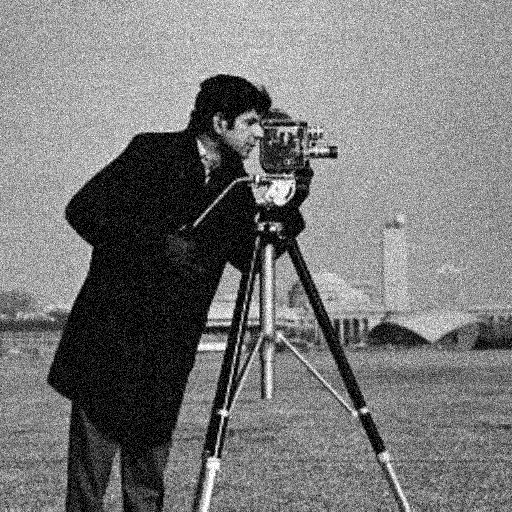

In [34]:
An = A .+ 0.1 .* randn.()
Gray.(An)

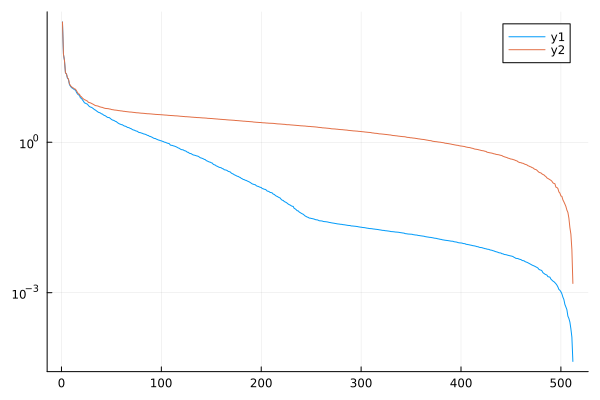

In [36]:
plot(svdvals(A);yscale=:log10); plot!(svdvals(An);yscale=:log10)

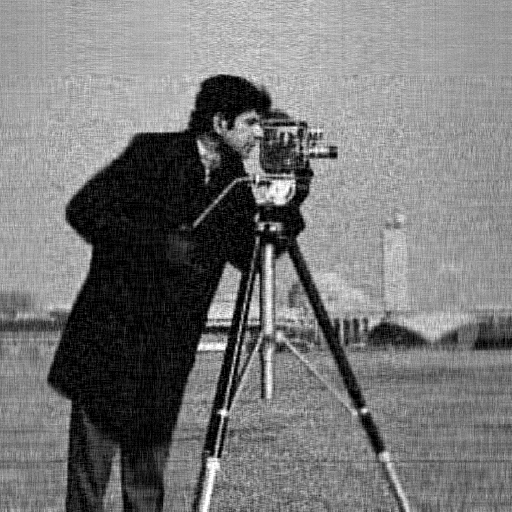

In [38]:
r = 50
U,σ,V = svd(An)

Gray.(U[:,1:r] * Diagonal(σ[1:r]) * V[:,1:r]')

# Function compression

In [1]:
using Plots

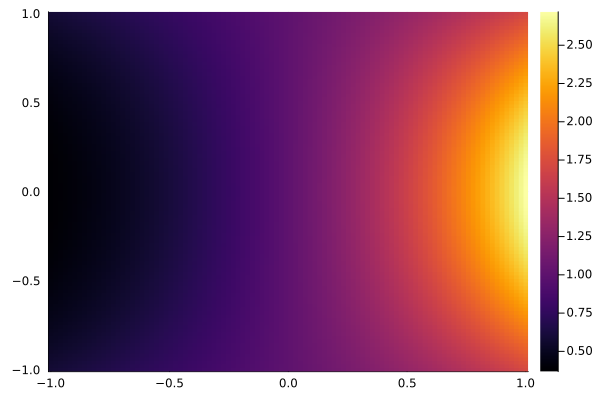

In [9]:
x = range(-1, 1; length=100)
y = range(-1, 1; length=101)
f = (x,y) -> exp(x*cos(y))
    
F = f.(x', y)
heatmap(x,y, F)

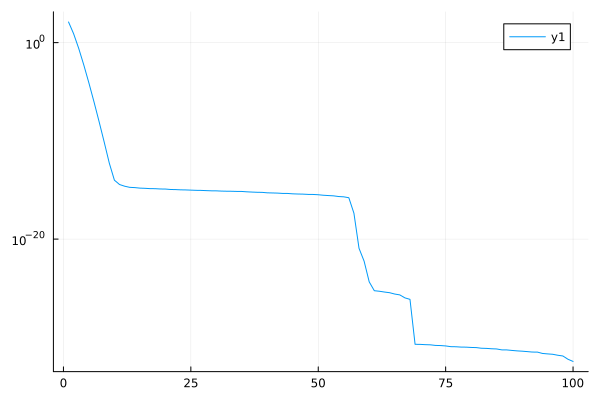

In [12]:
plot(svdvals(F); yscale=:log10)

In [15]:
U,σ, V = svd(F)


k = 5
norm(U[:,1:k] * Diagonal(σ[1:k]) * V[:,1:k]' - F)

9.083852516712987e-7

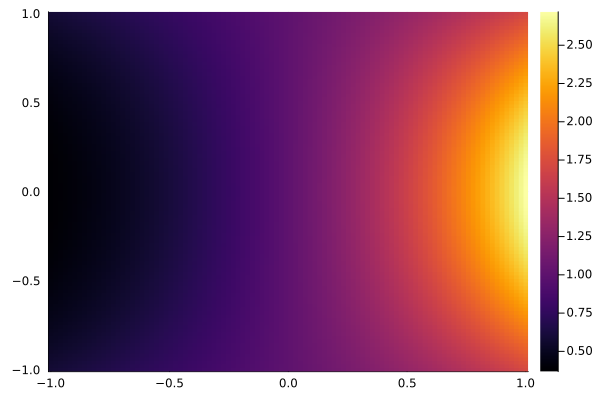

In [16]:
heatmap(x, y, U[:,1:k] * Diagonal(σ[1:k]) * V[:,1:k]')

In [ ]:
# "Nice" functions have only a small number of numerically nonzero singular vals!